In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, accuracy_score
import seaborn as sns

In [2]:
#Import dataframe from JSON file
jsonStr = "parameters_df.json"
imported_df = pd.read_json(jsonStr, orient ='index')
print(imported_df.head)

<bound method NDFrame.head of                                                   gray  group
data\10253\0\10253_idx5_x1001_y1001_class0.png  2.3008      0
data\10253\0\10253_idx5_x1001_y1051_class0.png  2.7392      0
data\10253\0\10253_idx5_x1001_y1101_class0.png  2.4604      0
data\10253\0\10253_idx5_x1001_y1151_class0.png  2.7792      0
data\10253\0\10253_idx5_x1001_y1201_class0.png  2.8936      0
...                                                ...    ...
data\10295\1\10295_idx5_x1601_y1451_class1.png  2.3604      1
data\10295\1\10295_idx5_x1601_y1501_class1.png  2.5424      1
data\10295\1\10295_idx5_x1601_y1551_class1.png  3.0948      1
data\10295\1\10295_idx5_x1651_y1301_class1.png  1.9532      1
data\10295\1\10295_idx5_x1651_y1351_class1.png  2.1260      1

[36512 rows x 2 columns]>


(25558, 1)
Mean square error:  0.18002556143874385
Accuracy score:  0.8199744385612562


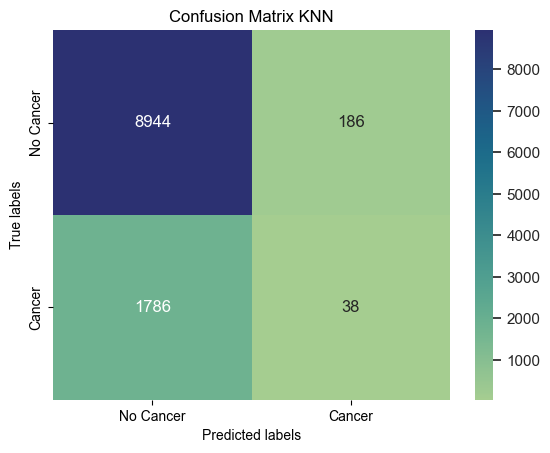

In [4]:
#Knn algorithm
k = 11

# Create feature and target arrays
X = imported_df[['gray']].values #Getting the features of the pictures
#'red','blue','green',
y = imported_df['group'].values #Getting the class of the pictures

#X = np.asarray(X, order='C', dtype=object)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.3, random_state=None)

print(X_train.shape)

#Knn classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train) #X_train should be (n_samples, n_features) or (n_samples, n_samples) if metric=’precomputed’
pred = knn.predict(X_test)


conf_mat = confusion_matrix(y_test, pred)

#Easy plot method
#disp = ConfusionMatrixDisplay(conf_mat)
#disp.plot()

#Alternative plot method
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(conf_mat, annot=True, ax=ax, cmap="crest", fmt="g");
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix KNN');
ax.xaxis.set_ticklabels(['No Cancer', 'Cancer']);
ax.yaxis.set_ticklabels(['No Cancer', 'Cancer']);

mse = mean_squared_error(y_test, pred)
acc = accuracy_score(y_test, pred)

print('Mean square error: ', mse)
print('Accuracy score: ', acc)


plt.show()

